## Imports

In [1]:
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from scripts import settings
from scripts import utils
import pandas as pd
import numpy as np
import shap
import os

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Participants, filter names,  directories, and models
#### variables

In [2]:
#participants_high_accuracy = ['aliceblackwood123@gmail.com', 'salman@nsl.inha.ac.kr', 'jumabek4044@gmail.com', 'nazarov7mu@gmail.com']
#participants_low_accuracy = ['laurentkalpers3@gmail.com', 'nnarziev@gmail.com', 'mr.khikmatillo@gmail.com']
participants_high_improvement = ['azizsambo58@gmail.com', 'nslabinha@gmail.com']
participants_low_improvement = ['jskim@nsl.inha.ac.kr', 'nnarziev@gmail.com']
participants_high_to_low_improvement = participants_high_improvement + participants_low_improvement
filter_datasets = {
    'no filter': settings.not_filtered_dataset_dir,
    'combined': settings.combined_filtered_dataset_dir,
    #'ppg': settings.ppg_filtered_dataset_dir,
    #'acc': settings.acc_filtered_dataset_dir
}

#### train & test

azizsambo58@gmail.com no filter 12150 150 12150


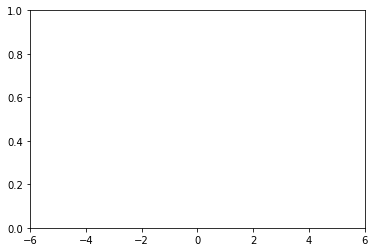

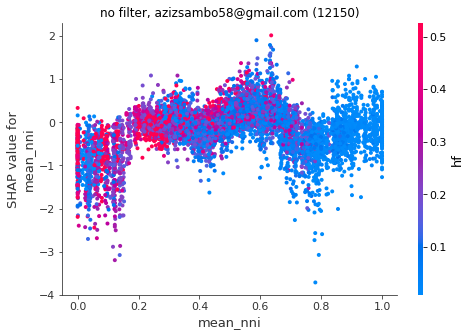

azizsambo58@gmail.com combined 12150 150 12150


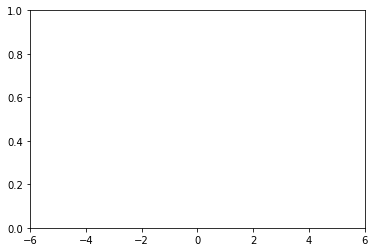

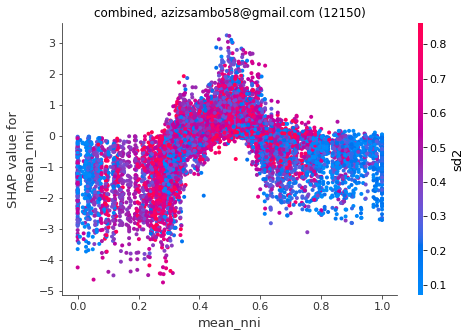

nslabinha@gmail.com no filter 1500 150 1500


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


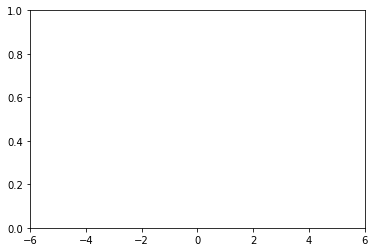

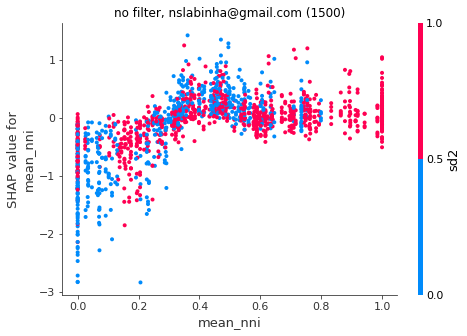

The least populated class in y has only 4 members, which is less than n_splits=5.


nslabinha@gmail.com combined 1450 145 1450


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


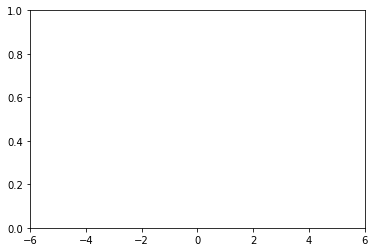

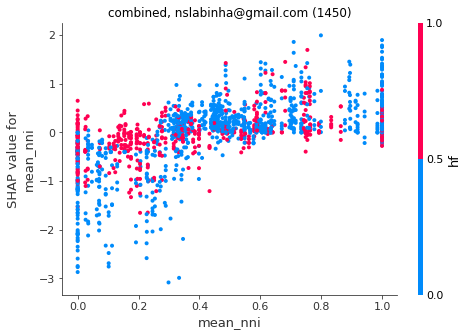

jskim@nsl.inha.ac.kr no filter 14850 150 14850


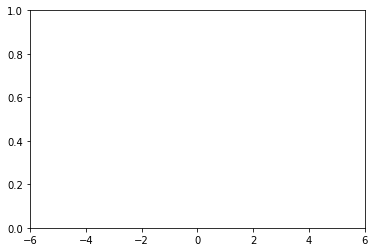

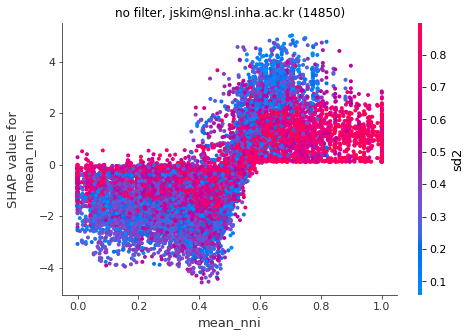

jskim@nsl.inha.ac.kr combined 14850 150 14850


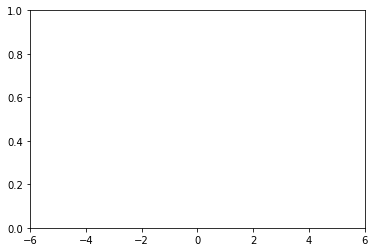

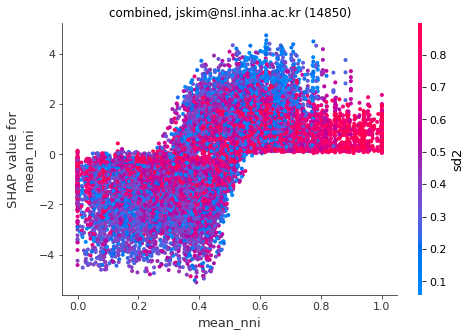

nnarziev@gmail.com no filter 36600 150 36600


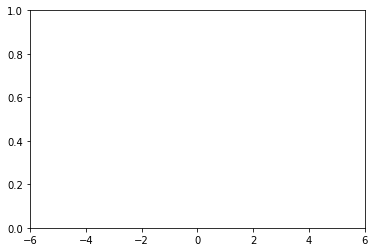

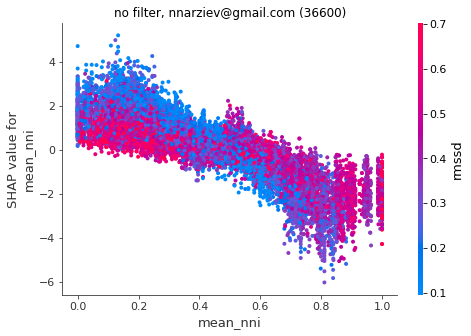

nnarziev@gmail.com combined 36600 150 36600


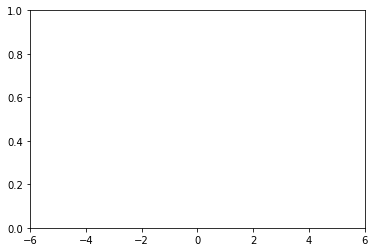

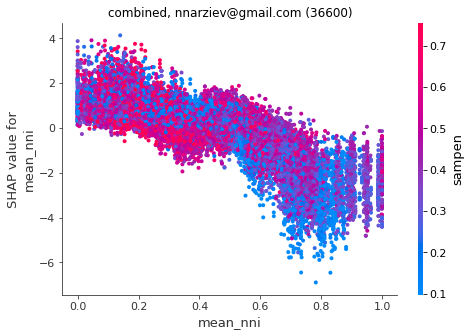

In [3]:
for participant in participants_high_to_low_improvement:
    for filter_name in filter_datasets.keys():
        all_models, all_test_features, confusion_matrix = utils.participant_train_for_model(
            participant=participant,
            train_dir=filter_datasets[filter_name]
        )

        # shap
        shap_values = []
        
        for model, test_features in zip(all_models, all_test_features):
            explainer = shap.TreeExplainer(model)
            shap_value = explainer.shap_values(test_features, tree_limit=model.best_ntree_limit)
            shap_values.append(shap_value)
        shap_values = np.vstack(shap_values)
        test_features = pd.concat(all_test_features, axis=0)
        print(participant, filter_name, len(shap_values), len(all_test_features), len(test_features))

        # shap : overall feature impacts
        plt.xlim(-6, 6)
        #shap.summary_plot(
        #    shap_values,
        #    test_features,
        #    sort=True,
        #    show=False
        #)
        shap.dependence_plot(
            'mean_nni',
            shap_values,
            test_features,
            show=False
        )
        plt.title(f'{filter_name}, {participant} ({len(shap_values)})')
        plt.show()
        
        # shap values
        pd.DataFrame(shap_values).head()
